# OCR Basics-EasyOCR

# Install and Import Dependencies

In [1]:
# !pip install torch torchvision torchaudio
# !pip install easyocr

# https://www.youtube.com/watch?v=ZVKaWPW9oQY&t=3s
# https://github.com/nicknochnack/EasyOCR/blob/main/OCR%20Basics-EasyOCR.ipynb
# https://www.youtube.com/watch?v=ic4chj-iMaI&t=294s
# https://www.youtube.com/watch?v=oyqNdcbKhew 
# https://www.youtube.com/watch?v=owiqdzha_DE
# https://www.youtube.com/watch?v=nnH55-zD38I
# https://www.youtube.com/watch?v=aGcLSH9TTLU&t=1s
# https://www.youtube.com/watch?v=6FGIPpvYBZw
# 



# https://www.youtube.com/watch?v=y1ZrOs9s2QA
# https://www.youtube.com/watch?v=NWeBJgVue9c


In [2]:
import numpy as np
import easyocr
import cv2
import os
from matplotlib import pyplot as plt

# Read in images or video

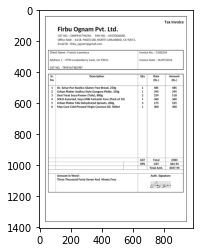

In [3]:
# IMAGE_PATH = r"Test Data/05.jpeg"
IMAGE_PATH = r"Test Data/06.jpg"

img = cv2.imread(IMAGE_PATH)

# https://www.geeksforgeeks.org/image-resizing-using-opencv-python/
img = cv2.resize(img, (0, 0), fx = 0.6, fy = 0.6)
# img = cv2.resize(img, (850, 850))
# img = cv2.resize(img, (850, 850), interpolation = cv2.INTER_NEAREST)

plt.imshow(img)
plt.show()

In [4]:
# reader = easyocr.Reader(['en'])
reader = easyocr.Reader(['en'], gpu=False)
# result = reader.readtext(IMAGE_PATH)
result = reader.readtext(img)
result

Using CPU. Note: This module is much faster with a GPU.


[([[806, 62], [936, 62], [936, 90], [806, 90]],
  'Tax Invoice',
  0.9997388160474691),
 ([[114, 100], [512, 100], [512, 153], [114, 153]],
  'Firbu Ognam Pvt. Ltd:',
  0.7716218146624702),
 ([[119, 155], [187, 155], [187, 175], [119, 175]],
  'GST NO.',
  0.7809763518610466),
 ([[200, 154], [342, 154], [342, 178], [200, 178]],
  'QWFR45796296,',
  0.9905975114966762),
 ([[359, 155], [429, 155], [429, 175], [359, 175]],
  'PAN NO',
  0.995705352081269),
 ([[442, 154], [562, 154], [562, 178], [442, 178]],
  'ASSZDDGDS8,',
  0.5522917083681711),
 ([[117, 181], [217, 181], [217, 201], [117, 201]],
  'Office Addr.',
  0.7359705032208584),
 ([[229, 180], [623, 180], [623, 201], [229, 201]],
  '6118, PASEO DEL NORTE CARLASBAD, CA 92011,',
  0.6733526596640224),
 ([[118, 206], [190, 206], [190, 230], [118, 230]],
  'Email ID',
  0.7905277917363159),
 ([[198, 204], [410, 204], [410, 234], [198, 234]],
  'firbu_ognam@gmail.com',
  0.9678735675657226),
 ([[67, 263], [171, 263], [171, 283], [67, 

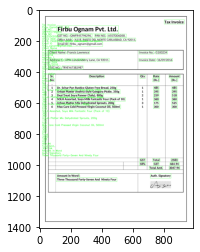

In [5]:
# img = cv2.imread(IMAGE_PATH)
spacer = 100
font = cv2.FONT_HERSHEY_SIMPLEX
for detection in result: 
    top_left = tuple(detection[0][0])
    bottom_right = tuple(detection[0][2])
    text = detection[1]
    img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),1)
    img = cv2.putText(img,text,(20,spacer), font, 0.5,(0,255,0),1,cv2.LINE_AA)
    spacer+=15
    
plt.imshow(img)
plt.show()

In [6]:
# Filename
filename = 'savedImage2.jpg'

# Using cv2.imwrite() method
# Saving the image
cv2.imwrite(filename, img)
  
# List files and directories  
# in 'C:/Users / Rajnish / Desktop / GeeksforGeeks'  
print("After saving image:")  
print(os.listdir())

print('Successfully saved')

After saving image:
['.ipynb_checkpoints', 'Deployment', 'ocr_python_textbook', 'Project Invoice - 1.ipynb', 'Project Invoice.ipynb', 'Samples', 'savedImage1.jpg', 'savedImage2.jpg', 'savedImage3.jpg', 'Test Data']
Successfully saved


In [ ]:
# !pip install -q keras-ocr

In [ ]:
import keras_ocr
import matplotlib.pyplot as plt
import cv2

In [ ]:
pipeline = keras_ocr.pipeline.Pipeline()

In [ ]:
IMAGE_PATH = r"Test Data/06.jpg"
img = cv2.imread(IMAGE_PATH)
img = cv2.resize(img, (0, 0), fx = 0.4, fy = 0.4)

# images = [keras_ocr.tools.read(img)]

image = [keras_ocr.tools.read(img)]

In [ ]:
# len(images)
len(image)

In [ ]:
plt.figure(figsize = (10,20))
# plt.imshow(images[0])
plt.imshow(image)

In [ ]:
prediction_groups = pipeline.recognize(image)

In [ ]:
# fig, axs = plt.subplots(nrows=len(images), figsize=(10, 20))
# for ax, image, predictions in zip(axs, images, prediction_groups):
#     keras_ocr.tools.drawAnnotations(image=image, 
#                                     predictions=predictions, 
#                                     ax=ax)

keras_ocr.tools.drawAnnotations(image=image, 
                                predictions=prediction_groups, 
                                )